<font face="B Mitra" size=4>
<div dir=rtl align=center>
<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">
<br>
<font size=6>
<b>پروژه سوم داده کاوی</b>
<br>
<b><font size=5> استاد درس: دکتر فاطمه شاکری</b>
<hr>
</div>
</font>

In [1]:
!pip install langdetect
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_lg-0.5.4.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=4f2bb50dc003c54f58730e4fdb035400e73b620f86038d5809df9adb9b363d33
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 10.2 MB/s eta 0:00:00
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.2/531.2 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... d

In [2]:

import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_formats = ['svg']
import seaborn as sns

# Used to draw a progress bar for longer method calls
from tqdm import tqdm

# Used to detect language used in each document
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

# Pre-trained natural language processing pipeline for biomedical use
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg

# Used to import list of punctuations
import string

# Feature extraction (text vectorizers)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering and evaluation
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# Topic modeling
from sklearn.decomposition import LatentDirichletAllocation

!gdown 15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae

In [3]:
!gdown 15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae

Downloading...
From (original): https://drive.google.com/uc?id=15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae
From (redirected): https://drive.google.com/uc?id=15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae&confirm=t&uuid=2d3d4a3b-5b0f-4cb8-a328-76ef7ccad3c6
To: /content/10k_df.csv
100% 341M/341M [00:07<00:00, 44.8MB/s]


In [4]:
df_10k = pd.read_csv('10k_df.csv')

In [5]:
df_10k.fillna(value=" ",inplace=True)

In [6]:
df = df_10k.sample(1500, random_state=42)
del df_10k

In [7]:
df.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary
6252,fefd6cdcddcb00d1ba2ef1a0d3bba9f312010a1d,10.1111/j.1524-4733.2008.00379.x,,China is the biggest country in the world that...,"Li, Youing. Sun, Xin. Wang, Li",Evidence-Based Medicine in China,Value in Health,Not provided.
4684,2a3d080d5dcf6771db002366691f35e5d6f0e493,10.1007/s13238-010-0029-7,,"✉ Correspondence: zlshi@wh.iov.cn Bat, the onl...","Shi, Zhengli",Bat and virus,Protein & Cell,Not provided.
1731,2de657aabab331e75657bfc1443542fd345b6f26,10.1016/j.ccc.2019.06.001,KEYWORDS\nPandemic Influenza Disaster prepared...,Outbreaks of infectious disease pose unique ch...,"Maves, Ryan C.. Jamros, Christina M.. Smith...",Intensive Care Unit Preparedness During<br>Pa...,Crit Care Clin,KEYWORDS\nPandemic Influenza Disaster<br>prep...
4742,bc22758234283f024f16e2dbe660bc909b512b92,10.1016/j.vetpar.2007.11.020,Cryptosporidium parvum is recognized as one of...,Diarrhoeal diseases of infectious aethiology r...,"Klein, Pavel. Kleinová, Tereza. Volek,<br>Z...",Effect of Cryptosporidium parvum infection on...,Veterinary Parasitology,Cryptosporidium parvum is recognized as one o...
4521,a204aafa38365dbcc0a26af3ca2c6d3313d7fab2,10.1111/irv.12518,", Brazil, in the period of Background: The res...",The inclusion criteria for asymptomatic adults...,"Moreira, Luciana Peniche. Watanabe, Aripuana...",Respiratory syncytial virus evaluation among<...,Influenza Other Respir Viruses,", Brazil, in the period of Background: The<br..."


In [8]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Detect language for each article
df['language'] = df['body_text'].apply(detect_language)
language_percentage = df['language'].value_counts(normalize=True) * 100
print(language_percentage)

# Filter out non-English articles
df = df[df['language'] == 'en']
df = df.drop(columns=['language'])

language
en    96.933333
de     1.666667
fr     0.533333
es     0.533333
it     0.133333
nl     0.133333
pt     0.066667
Name: proportion, dtype: float64


In [9]:
# Initialize the spaCy model
parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 3000000

def clean_text(text):
    # Tokenize & Lemmatization
    doc = parser(text)
    tokens_lemma = [token.lemma_ for token in doc]

    # Removing Stopwords
    tokens_lemma_no_stopwords = [token for token in tokens_lemma if token.lower() not in STOP_WORDS]

    # Removing Punctuation
    tokens_lemma_no_stopwords_no_punctuation = [token for token in tokens_lemma_no_stopwords if token not in string.punctuation]

    return tokens_lemma_no_stopwords_no_punctuation

# Apply the cleaning function to the text columns
df['cleaned_text'] = df['body_text'].apply(clean_text)

/usr/local/lib/python3.10/dist-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]
/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [10]:
df.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,cleaned_text
6252,fefd6cdcddcb00d1ba2ef1a0d3bba9f312010a1d,10.1111/j.1524-4733.2008.00379.x,,China is the biggest country in the world that...,"Li, Youing. Sun, Xin. Wang, Li",Evidence-Based Medicine in China,Value in Health,Not provided.,"[china, biggest, country, world, 1.3, billion,..."
4684,2a3d080d5dcf6771db002366691f35e5d6f0e493,10.1007/s13238-010-0029-7,,"✉ Correspondence: zlshi@wh.iov.cn Bat, the onl...","Shi, Zhengli",Bat and virus,Protein & Cell,Not provided.,"[✉, correspondence, zlshi@wh.iov.cn, bat, flyi..."
1731,2de657aabab331e75657bfc1443542fd345b6f26,10.1016/j.ccc.2019.06.001,KEYWORDS\nPandemic Influenza Disaster prepared...,Outbreaks of infectious disease pose unique ch...,"Maves, Ryan C.. Jamros, Christina M.. Smith...",Intensive Care Unit Preparedness During<br>Pa...,Crit Care Clin,KEYWORDS\nPandemic Influenza Disaster<br>prep...,"[outbreaks, infectious, disease, pose, unique,..."
4742,bc22758234283f024f16e2dbe660bc909b512b92,10.1016/j.vetpar.2007.11.020,Cryptosporidium parvum is recognized as one of...,Diarrhoeal diseases of infectious aethiology r...,"Klein, Pavel. Kleinová, Tereza. Volek,<br>Z...",Effect of Cryptosporidium parvum infection on...,Veterinary Parasitology,Cryptosporidium parvum is recognized as one o...,"[diarrhoeal, diseases, infectious, aethiology,..."
4521,a204aafa38365dbcc0a26af3ca2c6d3313d7fab2,10.1111/irv.12518,", Brazil, in the period of Background: The res...",The inclusion criteria for asymptomatic adults...,"Moreira, Luciana Peniche. Watanabe, Aripuana...",Respiratory syncytial virus evaluation among<...,Influenza Other Respir Viruses,", Brazil, in the period of Background: The<br...","[inclusion, criteria, asymptomatic, adults, ab..."


In [44]:
# Import necessary library
from nltk.corpus import stopwords

# Define the function to remove stop words
def remove_stopwords(tokens, custom_stopwords):
    return [token for token in tokens if token.lower() not in custom_stopwords]

# Define the standard stop words set
STOP_WORDS = set(stopwords.words('english'))

# Add additional domain-specific stop words
DOMAIN_SPECIFIC_STOP_WORDS = {'et', 'al', 'rt', 'mr'}

# Combine both sets of stop words
ALL_STOP_WORDS = STOP_WORDS.union(DOMAIN_SPECIFIC_STOP_WORDS)

# Apply the remove_stopwords function to the 'cleaned_text' column of the dataframe
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_stopwords(x, ALL_STOP_WORDS))

In [45]:
df.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,cleaned_text,cleaned_text_str,cluster,hierarchical_cluster,dbscan_cluster
6252,fefd6cdcddcb00d1ba2ef1a0d3bba9f312010a1d,10.1111/j.1524-4733.2008.00379.x,,China is the biggest country in the world that...,"Li, Youing. Sun, Xin. Wang, Li",Evidence-Based Medicine in China,Value in Health,Not provided.,"[china, biggest, country, world, 1.3, billion,...",china biggest country world 1.3 billion popula...,5,2,-1
4684,2a3d080d5dcf6771db002366691f35e5d6f0e493,10.1007/s13238-010-0029-7,,"✉ Correspondence: zlshi@wh.iov.cn Bat, the onl...","Shi, Zhengli",Bat and virus,Protein & Cell,Not provided.,"[✉, correspondence, zlshi@wh.iov.cn, bat, flyi...",✉ correspondence zlshi@wh.iov.cn bat flying ma...,3,10,-1
1731,2de657aabab331e75657bfc1443542fd345b6f26,10.1016/j.ccc.2019.06.001,KEYWORDS\nPandemic Influenza Disaster prepared...,Outbreaks of infectious disease pose unique ch...,"Maves, Ryan C.. Jamros, Christina M.. Smith...",Intensive Care Unit Preparedness During<br>Pa...,Crit Care Clin,KEYWORDS\nPandemic Influenza Disaster<br>prep...,"[outbreaks, infectious, disease, pose, unique,...",outbreaks infectious disease pose unique chall...,5,2,-1
4742,bc22758234283f024f16e2dbe660bc909b512b92,10.1016/j.vetpar.2007.11.020,Cryptosporidium parvum is recognized as one of...,Diarrhoeal diseases of infectious aethiology r...,"Klein, Pavel. Kleinová, Tereza. Volek,<br>Z...",Effect of Cryptosporidium parvum infection on...,Veterinary Parasitology,Cryptosporidium parvum is recognized as one o...,"[diarrhoeal, diseases, infectious, aethiology,...",diarrhoeal diseases infectious aethiology repr...,2,0,-1
4521,a204aafa38365dbcc0a26af3ca2c6d3313d7fab2,10.1111/irv.12518,", Brazil, in the period of Background: The res...",The inclusion criteria for asymptomatic adults...,"Moreira, Luciana Peniche. Watanabe, Aripuana...",Respiratory syncytial virus evaluation among<...,Influenza Other Respir Viruses,", Brazil, in the period of Background: The<br...","[inclusion, criteria, asymptomatic, adults, ab...",inclusion criteria asymptomatic adults absence...,10,6,-1


In [46]:
# To String
df['cleaned_text_str'] = df['cleaned_text'].apply(lambda tokens: ' '.join(tokens))

# Initialize the TF-IDF Vectorizer with a maximum of 4096 features
tfidf_vectorizer = TfidfVectorizer(max_features=4096)

# Fit and transform the cleaned text to extract TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text_str'])

# Convert the tfidf_matrix to a DataFrame for easier inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [15]:
tfidf_df.head()

,00,000,0001,001,01,02,03,04,05,06,...,zikv,zone,zoonotic,µg,µl,µm,à1,μg,μl,μm
0,0.0,0.028805,0.000000,0.0,0.00000,0.0,0.023852,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.021187,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.043144,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.012920,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.00852,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.011280,0.0,0.0,0.0,0.032265,0.0,0.000000,0.0
4,0.0,0.000000,0.072229,0.0,0.00000,0.0,0.000000,0.0,0.013501,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.021868,0.0


In [47]:
# Initialize PCA to retain 95% of the variance
pca = PCA(n_components=0.95, random_state=42)

# Fit and transform the TF-IDF matrix
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame for the PCA-transformed features
pca_df = pd.DataFrame(tfidf_pca)

In [48]:
print(f"Original number of features: {tfidf_df.shape[1]}")
print(f"Reduced number of features: {pca_df.shape[1]}")

Original number of features: 4096
Reduced number of features: 953


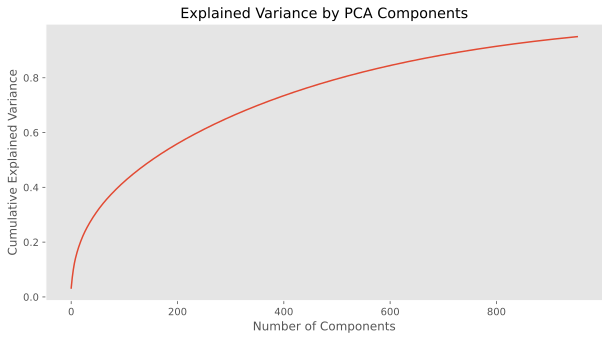

In [49]:
# Optionally, plot the explained variance ratio to visualize how much variance is retained
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [50]:
# Determine the optimal number of clusters using the Elbow Method
distortions = []
K = range(1, 31)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_pca)
    distortions.append(sum(np.min(cdist(tfidf_pca, kmeans.cluster_centers_, 'euclidean'), axis=1)) / tfidf_pca.shape[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

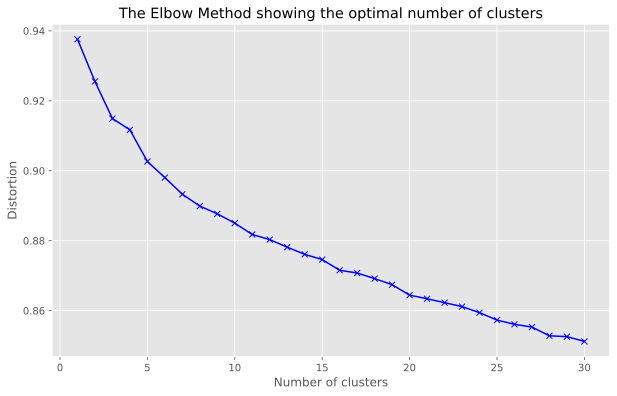

In [51]:
# Plot the elbow
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.grid(True)
plt.show()

In [78]:
# Fit the K-Means model with the optimal number of clusters
optimal_k = 28
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_pca)
clusters = kmeans.labels_

# Display the first few rows of the DataFrame with cluster labels
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,cleaned_text,cleaned_text_str,cluster,hierarchical_cluster
6252,fefd6cdcddcb00d1ba2ef1a0d3bba9f312010a1d,10.1111/j.1524-4733.2008.00379.x,,China is the biggest country in the world that...,"Li, Youing. Sun, Xin. Wang, Li",Evidence-Based Medicine in China,Value in Health,Not provided.,"[china, biggest, country, world, 1.3, billion,...",china biggest country world 1.3 billion popula...,0,0
4684,2a3d080d5dcf6771db002366691f35e5d6f0e493,10.1007/s13238-010-0029-7,,"✉ Correspondence: zlshi@wh.iov.cn Bat, the onl...","Shi, Zhengli",Bat and virus,Protein & Cell,Not provided.,"[✉, correspondence, zlshi@wh.iov.cn, bat, flyi...",✉ correspondence zlshi@wh.iov.cn bat flying ma...,18,0
1731,2de657aabab331e75657bfc1443542fd345b6f26,10.1016/j.ccc.2019.06.001,KEYWORDS\nPandemic Influenza Disaster prepared...,Outbreaks of infectious disease pose unique ch...,"Maves, Ryan C.. Jamros, Christina M.. Smith...",Intensive Care Unit Preparedness During<br>Pa...,Crit Care Clin,KEYWORDS\nPandemic Influenza Disaster<br>prep...,"[outbreaks, infectious, disease, pose, unique,...",outbreaks infectious disease pose unique chall...,13,0
4742,bc22758234283f024f16e2dbe660bc909b512b92,10.1016/j.vetpar.2007.11.020,Cryptosporidium parvum is recognized as one of...,Diarrhoeal diseases of infectious aethiology r...,"Klein, Pavel. Kleinová, Tereza. Volek,<br>Z...",Effect of Cryptosporidium parvum infection on...,Veterinary Parasitology,Cryptosporidium parvum is recognized as one o...,"[diarrhoeal, diseases, infectious, aethiology,...",diarrhoeal diseases infectious aethiology repr...,12,0
4521,a204aafa38365dbcc0a26af3ca2c6d3313d7fab2,10.1111/irv.12518,", Brazil, in the period of Background: The res...",The inclusion criteria for asymptomatic adults...,"Moreira, Luciana Peniche. Watanabe, Aripuana...",Respiratory syncytial virus evaluation among<...,Influenza Other Respir Viruses,", Brazil, in the period of Background: The<br...","[inclusion, criteria, asymptomatic, adults, ab...",inclusion criteria asymptomatic adults absence...,15,0


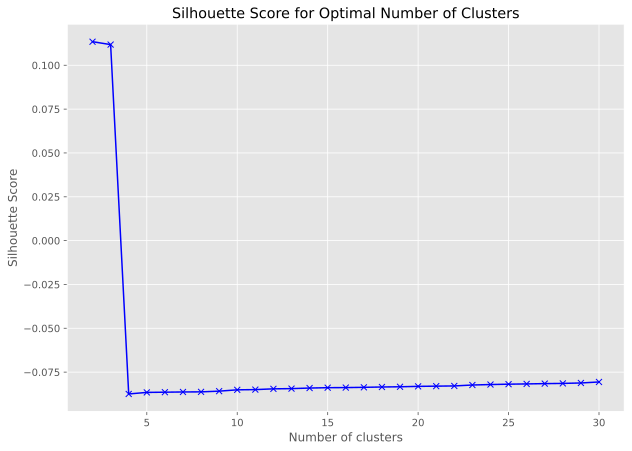

In [82]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define a range for the number of clusters to test
range_n_clusters = range(2, 31)

# List to store the average silhouette scores for each number of clusters
silhouette_avg_scores = []

# Loop through the range of cluster numbers
for n_clusters in range_n_clusters:
    # Create an AgglomerativeClustering model with the specified number of clusters
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit the model and predict the cluster for each sample
    cluster_labels = hierarchical.fit_predict(data_scaled)

    # Calculate the average silhouette score for the current clustering
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)

    # Append the average silhouette score to the list
    silhouette_avg_scores.append(silhouette_avg)

# Plot the silhouette scores against the number of clusters
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, silhouette_avg_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

In [80]:
# Find the optimal number of clusters with the highest silhouette score
optimal_k = range_n_clusters[silhouette_avg_scores.index(max(silhouette_avg_scores))]
print(f'The optimal number of clusters is {optimal_k}')

The optimal number of clusters is 2


In [81]:
from sklearn.cluster import AgglomerativeClustering

# Fit the Hierarchical Clustering model
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
df['hierarchical_cluster'] = hierarchical.fit_predict(tfidf_pca)

# Display the first few rows of the DataFrame with hierarchical cluster labels
df.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,cleaned_text,cleaned_text_str,cluster,hierarchical_cluster
6252,fefd6cdcddcb00d1ba2ef1a0d3bba9f312010a1d,10.1111/j.1524-4733.2008.00379.x,,China is the biggest country in the world that...,"Li, Youing. Sun, Xin. Wang, Li",Evidence-Based Medicine in China,Value in Health,Not provided.,"[china, biggest, country, world, 1.3, billion,...",china biggest country world 1.3 billion popula...,0,0
4684,2a3d080d5dcf6771db002366691f35e5d6f0e493,10.1007/s13238-010-0029-7,,"✉ Correspondence: zlshi@wh.iov.cn Bat, the onl...","Shi, Zhengli",Bat and virus,Protein & Cell,Not provided.,"[✉, correspondence, zlshi@wh.iov.cn, bat, flyi...",✉ correspondence zlshi@wh.iov.cn bat flying ma...,18,0
1731,2de657aabab331e75657bfc1443542fd345b6f26,10.1016/j.ccc.2019.06.001,KEYWORDS\nPandemic Influenza Disaster prepared...,Outbreaks of infectious disease pose unique ch...,"Maves, Ryan C.. Jamros, Christina M.. Smith...",Intensive Care Unit Preparedness During<br>Pa...,Crit Care Clin,KEYWORDS\nPandemic Influenza Disaster<br>prep...,"[outbreaks, infectious, disease, pose, unique,...",outbreaks infectious disease pose unique chall...,13,0
4742,bc22758234283f024f16e2dbe660bc909b512b92,10.1016/j.vetpar.2007.11.020,Cryptosporidium parvum is recognized as one of...,Diarrhoeal diseases of infectious aethiology r...,"Klein, Pavel. Kleinová, Tereza. Volek,<br>Z...",Effect of Cryptosporidium parvum infection on...,Veterinary Parasitology,Cryptosporidium parvum is recognized as one o...,"[diarrhoeal, diseases, infectious, aethiology,...",diarrhoeal diseases infectious aethiology repr...,12,0
4521,a204aafa38365dbcc0a26af3ca2c6d3313d7fab2,10.1111/irv.12518,", Brazil, in the period of Background: The res...",The inclusion criteria for asymptomatic adults...,"Moreira, Luciana Peniche. Watanabe, Aripuana...",Respiratory syncytial virus evaluation among<...,Influenza Other Respir Viruses,", Brazil, in the period of Background: The<br...","[inclusion, criteria, asymptomatic, adults, ab...",inclusion criteria asymptomatic adults absence...,15,0


In [71]:
from sklearn.metrics import silhouette_score

# Evaluate the K-Means clustering
kmeans_silhouette = silhouette_score(tfidf_pca, df['cluster'])
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

# Evaluate the Hierarchical clustering
hierarchical_silhouette = silhouette_score(tfidf_pca, df['hierarchical_cluster'])
print(f'Hierarchical Silhouette Score: {hierarchical_silhouette}')

K-Means Silhouette Score: 0.03723554387616387
Hierarchical Silhouette Score: 0.012668738798288552


In [58]:
# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(tfidf_matrix.toarray())

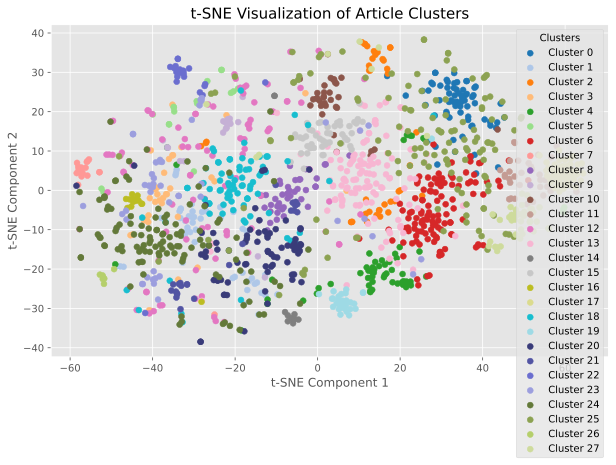

In [83]:
# Define the number of clusters
n_clusters = 28

# Create a color palette with 28 colors
colors = sns.color_palette('tab20', n_colors=min(20, n_clusters)) + sns.color_palette('tab20b', n_colors=max(0, n_clusters - 20))

# Convert to a numpy array for easier access
colors = np.array(colors)

# Create a scatter plot with clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with different colors
for cluster_label in set(clusters):
    plt.scatter(
        X_tsne[clusters == cluster_label, 0],
        X_tsne[clusters == cluster_label, 1],
        label=f'Cluster {cluster_label}',
        color=colors[cluster_label % len(colors)]
    )

# Add title and labels to the plot
plt.title('t-SNE Visualization of Article Clusters', fontsize=15)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)

# Show the legend
plt.legend(title='Clusters')

# Display the plot
plt.show()

In [86]:
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 5

def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return topics

# Initialize the Count Vectorizer
count_vectorizer = CountVectorizer(max_features=4096)

# Fit and transform the cleaned text to extract Count features
count_matrix = count_vectorizer.fit_transform(df['cleaned_text_str'])

# Fit the LDA model on the entire dataset
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(count_matrix)

# Display topics for each cluster
for cluster_num in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_num]
    cluster_count_matrix = count_vectorizer.transform(cluster_data['cleaned_text_str'])
    lda.fit(cluster_count_matrix)
    print(f"Cluster {cluster_num} Topics with LDA:")
    topics = display_topics(lda, count_vectorizer.get_feature_names_out(), 10)
    for topic in topics:
        print(topic)
    print("\n")

Cluster 0 Topics with LDA:
control studies surveillance study dengue health interventions community intervention outbreak
health public disease diseases national infectious response new biological surveillance
health countries disease global people care human ebola international social
pandemic public infection risk respiratory health influenza people outbreak healthcare
health cases 2009 h1n1 diseases data disease population study china


Cluster 1 Topics with LDA:
virus viral rna protein viruses infection cells influenza replication proteins
protein binding proteins domain structure al residues figure rna par
proteins virus protein viral host viruses cell rna replication cells
binding hiv peptide residues 3c peptides virus structure activity inhibitor
cells cell proteins membrane protein viral er specific hcv type


Cluster 2 Topics with LDA:
ards lung surfactant injury syndrome respiratory pulmonary pressure clinical 10
particles particle respiratory air transmission nanoparticles m

In [61]:
from sklearn.decomposition import NMF

# Fit the NMF model on the entire dataset
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(count_matrix)

# Display topics for each cluster
for cluster_num in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_num]
    cluster_count_matrix = count_vectorizer.transform(cluster_data['cleaned_text_str'])
    nmf.fit(cluster_count_matrix)
    print(f"Cluster {cluster_num} Topics with NMF:")
    topics = display_topics(nmf, count_vectorizer.get_feature_names_out(), 10)
    for topic in topics:
        print(topic)
    print("\n")

Cluster 0 Topics with NMF:
health countries care ebola disease public global regional policy water
control studies surveillance dengue study interventions intervention community health outbreak
2009 h1n1 cases pandemic flu public diarrhea health infection respiratory
china diseases aids hiv cases disease infectious population 000 government
public health biological agents response research national local state program


Cluster 1 Topics with NMF:
rna viral virus dna viruses translation protein replication dsrna al
binding 3c residues structure protein domain al site 1a figure
cells virus hiv cell influenza viral infection type binding viruses
proteins protein host cell virus cells cellular viral pathogen viruses
autophagy viral virus protein role cell pkr proteins death replication


Cluster 2 Topics with NMF:
patients airway patient ventilation tube intubation respiratory obstruction risk described
filter filtration efficiency filters aerosol pressure layer drop aerosols loading
wind 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Cluster 8 Topics with NMF:
al pcr rna rt 10 virus samples real time viral
water detection based method sensor technique samples analysis al monitoring
pcr samples positive clinical respiratory detection patients results time assays
dna viral pcr primer viruses hiv virus specific human rna
detection surface biosensor dna sensitivity gold sensor ml disease measurement


Cluster 9 Topics with NMF:
ibv strains gene s1 strain al sequences 91 gi sequence
epitopes protein cell vaccine predicted epitope score hla antigenic binding
human liver malaria mouse parasite hepatocytes proteins stage infected host
10 ibv strains vaccine chickens 09 strain group virus protection
motifs sera disease epitope panel peptide motif antigens specific specificity


Cluster 10 Topics with NMF:
influenza virus viruses vaccines vaccine pandemic treatment years human viral
patients flu disease days enrolled influenza h1n1 progression studies risk
ili study influenza household cases children respiratory associated i

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Cluster 18 Topics with NMF:
al cells viral virus proteins membrane replication protein cell infection
al emissions aircraft aviation rf ice particles 1999 climate model
viruses al rna virus like plant host plants evolution fungi
al cysteine conjugate enzyme conjugates reaction kidney acid amino human
al species studies pd risk forest disease study pcr bats


Cluster 19 Topics with NMF:
cov al mers virus infection human 2014 animals reported transmission
cov mers cells virus viral figure rna protein cell infection
mers patients cov cases infection risk transmission saudi respiratory case
rbd fc mers mice cov protein specific igg 10 serum
cov mers infection lung viral mice cells treatment fig tissue


Cluster 20 Topics with NMF:
gene patients mutations analysis genes mutation chromosome expression patient syndrome
viruses genome virus sequences viral species genomes human sequence genes
mnmc trna figure nm growth strain mm pathway phase modification
rna al strand figure sequence structur

In [84]:
def interactive_plot(df):
    clusters = sorted(df['y'].unique())

    # Generate distinct colors for each cluster using Plotly's colors
    colors = px.colors.qualitative.Plotly

    # Create a scatter plot for each cluster with a unique color
    data = []
    for i, cluster in enumerate(clusters):
        cluster_data = df[df['y'] == cluster]
        scatter = go.Scatter(
            x=cluster_data['tsne-2d-one'],
            y=cluster_data['tsne-2d-two'],
            mode='markers',
            name=f'Cluster {cluster}',
            text=cluster_data['title'],
            hoverinfo='text',
            marker=dict(size=10, color=colors[i % len(colors)]),  # Assign a unique color
            visible=False  # Initially, make all traces invisible
        )
        data.append(scatter)

    # Add a scatter plot for all clusters with different colors
    scatter_all = go.Scatter(
        x=df['tsne-2d-one'],
        y=df['tsne-2d-two'],
        mode='markers',
        name='All Clusters',
        text=df['title'],
        hoverinfo='text',
        marker=dict(size=10, color=df['y'].map(lambda x: colors[x % len(colors)])),  # Assign colors by cluster
        visible=True  # Initially, show all clusters
    )
    data.append(scatter_all)

    x_min = df['tsne-2d-one'].min()
    x_max = df['tsne-2d-one'].max()
    y_min = df['tsne-2d-two'].min()
    y_max = df['tsne-2d-two'].max()

    # Initialize the figure
    fig = go.Figure(data=data)

    # Ensure square aspect ratio
    fig.update_layout(
        title='Cluster Visualization',
        xaxis=dict(title='t-SNE 1', range=[x_min, x_max]),  # Ensure x and y axes are equal
        yaxis=dict(title='t-SNE 2', range=[y_min, y_max]),
        width=1000,
        height=700  # Ensure the figure is square-shaped
    )

    # Add hover functionality
    fig.update_traces(
        hoverinfo='text',
        marker=dict(opacity=0.7, size=8),
    )

    # Add interactive slider for cluster selection
    steps = []
    for i, cluster in enumerate(clusters):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(clusters) + [False]},  # Hide all clusters
                {'title': f'Cluster {cluster}'}],
            label=f'Cluster {cluster}'
        )
        # Only make the current cluster visible
        step['args'][0]['visible'][i] = True
        steps.append(step)

    # Add final step for all clusters
    steps.append(dict(
        method='update',
        args=[{'visible': [False] * len(clusters) + [True]},  # Only show the 'all clusters' trace
            {'title': 'All Clusters'}],
        label='All Clusters'
    ))

    sliders = [dict(
        active=len(steps) - 1,
        currentvalue={"prefix": "Cluster: "},
        pad={"t": 50},
        steps=steps
    )]

    fig.update_layout(
        sliders=sliders
    )

    # Display the plot
    fig.show()